<a href="https://colab.research.google.com/github/aliEsmaelFard/aliEsmaelFard-Stock-price-prediction-using-the-RNN-Ml-Model/blob/main/RnnGoogleStockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")

In [151]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [152]:
trainset = dataset_train.iloc[:,1:2].values

In [153]:
trainset

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [154]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(trainset)

In [155]:
training_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [156]:
len(training_scaled)

1258

In [157]:
x_train = []
y_train = []

In [158]:
for i in range(60, 1258):
  x_train.append(training_scaled[i-60:i, 0])
  y_train.append(training_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [159]:
x_train.shape

(1198, 60)

In [160]:
y_train.shape

(1198,)

In [161]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [162]:
x_train.shape

(1198, 60, 1)

In [189]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [190]:
 regressor = Sequential()
 regressor.add(LSTM(units = 50 , return_sequences=True, input_shape = (x_train.shape[1],1)))

In [191]:
regressor.add(Dropout(0.2))

In [192]:
regressor.add(LSTM(units = 50 , return_sequences=True))
regressor.add(Dropout(0.2))

In [194]:
regressor.add(LSTM(units = 50 , return_sequences=True))
regressor.add(Dropout(0.2))

In [195]:
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

In [196]:
regressor.add(Dense(units=1))

In [197]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'] )

In [198]:
regressor.fit(x_train, y_train, epochs=100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 18s 168ms/step - loss: 0.0518 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 8s 202ms/step - loss: 0.0069 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 8s 200ms/step - loss: 0.0062 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0054 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 8s 202ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0052 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0052 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0046 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0048 - accur

In [199]:
dataset_test = pd.read_csv("/content/Google_Stock_Price_Test.csv")

In [202]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [203]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [204]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [205]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [206]:
inputs = sc.transform(inputs)
inputs.shape

(80, 1)

In [207]:
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i,0])

In [208]:
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [209]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [212]:
predicted_price = regressor.predict(x_test)

1/1 [==============================] - 0s 297ms/step


In [213]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[800.8111 ],
       [798.3835 ],
       [798.24567],
       [799.00366],
       [801.19977],
       [805.4509 ],
       [809.40546],
       [810.9008 ],
       [811.12036],
       [811.1202 ],
       [811.23785],
       [811.3132 ],
       [811.35474],
       [811.8797 ],
       [812.7084 ],
       [816.49194],
       [822.1946 ],
       [828.28925],
       [831.6819 ],
       [828.71625]], dtype=float32)

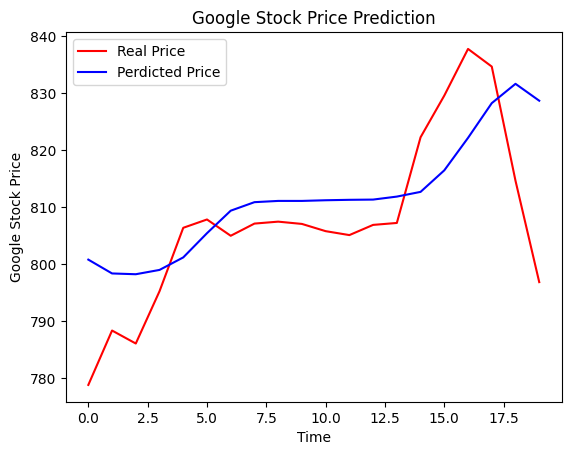

In [214]:
plt.plot(real_stock_price, color = 'red', label = 'Real Price')
plt.plot(predicted_price,color = 'blue', label = 'Perdicted Price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()